In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## COVID


##### Dados podem ser acessados em:
brasil.io/dataset/covid19/caso_full/

In [2]:
covid = pd.read_csv('../data/caso_full.csv')
covid.loc[:,'date'] = covid['date'].astype('datetime64[ns]')
covid.set_index('date', inplace=True)

In [3]:
# covid_state = covid[(covid['place_type']=='state')]
covid_city = covid[(covid['place_type']=='city')]

In [4]:
covid.columns

Index(['city', 'city_ibge_code', 'epidemiological_week',
       'estimated_population_2019', 'is_last', 'is_repeated',
       'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'place_type', 'state', 'new_confirmed', 'new_deaths'],
      dtype='object')

### new confirmed

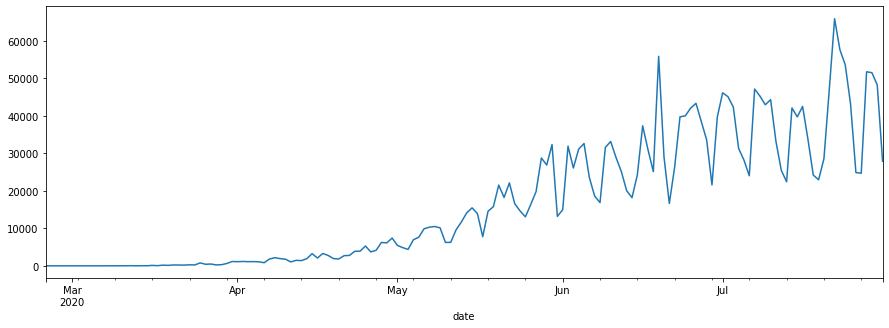

In [5]:
ax1 = covid_city['new_confirmed'].resample('D').sum().plot(figsize=(15, 5))

### new deaths

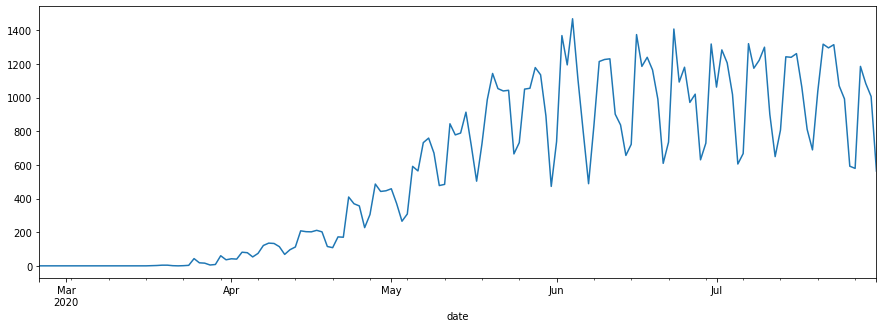

In [6]:
ax2 = covid_city['new_deaths'].resample('D').sum().plot(figsize=(15, 5))

____________

In [7]:
print('Número de mortes: {}'.format(covid_city['new_deaths'].sum()))
print('Número de casos confirmados: {}'.format(covid_city['new_confirmed'].sum()))

Número de mortes: 91340
Número de casos confirmados: 2620071


_______________

In [8]:
covid_city[['state','new_confirmed', 'new_deaths']].groupby('state').sum().sort_values('new_confirmed', ascending=False)

,new_confirmed,new_deaths
state,,
SP,542304,22997
CE,174662,7692
BA,166154,3463
RJ,163642,13348
PA,156053,5750
MG,127106,2769
MA,119262,2996
DF,102342,1419
AM,100140,3252


## MOBILIDADE

##### Dados podem ser acessados em:
https://console.cloud.google.com/marketplace/product/bigquery-public-datasets/covid19_google_mobility?filter=solution-type:dataset&q=google&id=db650d71-e53e-4677-b37b-d8bdca3ec4dc&hl=pt_BR&project=metal-appliance-227513&folder=&organizationId=

#### Apresentação

https://datastudio.google.com/s/izxdqtz3JPY